# Packages used

In [ ]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import skimage
import tensorflow as tf
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import cv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator, array_to_img
from tensorflow.image import resize

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Functions define

In [ ]:
# 儲存產生的images
def DataAugmentation(label, quantity):
  folder = '/content/drive/Shareddrives/DataMining_2021/Term Project/Data/train/' + label +'/'
  folder_save = '/content/drive/Shareddrives/DataMining_2021/Term Project/Data/train_DG/' + label + '/'
  onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

  i = quantity
  while(i):
    j = np.random.randint(len(onlyfiles))
    f = folder + onlyfiles[j]
    img = imagegenerate(f)
    img.save(folder_save + 'DG' + str(quantity-i) +'.jpg', 'JPEG')
    i = i-1

In [ ]:
# 處理產生之圖片資料夾的圖片檔案
def imgpreprocessing2(label):

  data = []

  folder = '/content/drive/Shareddrives/DataMining_2021/Term Project/Data/train/DG/' + label + '/'
  onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
    
  for i in range(len(onlyfiles)):
    f = folder + onlyfiles[i]
    a = imgtoarray(f)
    a = np.append(a, label[0])
    data.append(a)

    if i%20 == 0:
        print(i, 'imgs are done.')
  print(label +' is done.')

  return data

# Main Code - Data preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# files' path
dir = "/content/drive/Shareddrives/DataMining_2021/Term Project/Data/"
labels = ['Covid', 'Viral Pneumonia', 'Normal']

[111, 70, 70]


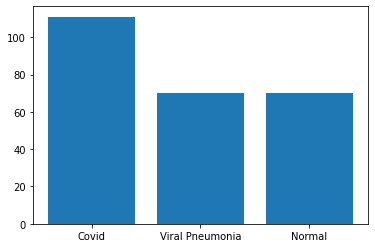

In [ ]:
# 檢查data個分類之平衡問題
train_C_num = len(os.listdir(dir + 'train/Covid'))
train_V_num = len(os.listdir(dir + 'train/Viral Pneumonia'))
train_N_num = len(os.listdir(dir + 'train/Normal'))

nums = [train_C_num, train_V_num, train_N_num]
print(nums)
plt.bar(labels, nums, )
plt.show()

In [ ]:
# define column names as each pixel and label
col = []
for i in range(256*256):
  col.append('pixel'+str(i+1))
col.append('label')

# Main Code - SVM classification

In [ ]:
# reading data
df_train = pd.read_csv('/content/drive/Shareddrives/DataMining_2021/Term Project/Data/train.csv')
df_train_DG = pd.read_csv('/content/drive/Shareddrives/DataMining_2021/Term Project/Data/train_DG.csv')
df_train_DG_500 = pd.read_csv('/content/drive/Shareddrives/DataMining_2021/Term Project/Data/train_DG_500.csv')
df_test = pd.read_csv('/content/drive/Shareddrives/DataMining_2021/Term Project/Data/test.csv')

df_zca_500 = pd.read_csv('/content/drive/Shareddrives/DataMining_2021/Term Project/Data/ZCA_500.csv')
df_zca_test = pd.read_csv('/content/drive/Shareddrives/DataMining_2021/Term Project/Data/ZCA_test.csv')


In [ ]:
X_train = df_train.iloc[: , 1:-1]
y_train = df_train.iloc[: , -1:].values.ravel()
print(X_train.shape)
print(y_train.shape)

X_train_DG = df_train_DG.iloc[: , 1:-1]
y_train_DG = df_train_DG.iloc[: , -1:].values.ravel()
print(X_train_DG.shape)
print(y_train_DG.shape)

X_train_DG_500 = df_train_DG_500.iloc[: , 1:-1]
y_train_DG_500 = df_train_DG_500.iloc[: , -1:].values.ravel()
print(X_train_DG_500.shape)
print(y_train_DG_500.shape)

X_test = df_test.iloc[: , 1:-1]
y_test = df_test.iloc[: , -1:].values.ravel()
print(X_test.shape)
print(y_test.shape)

X_train_zca = df_zca_500.iloc[: , 1:-1]
y_train_zca = df_zca_500.iloc[: , -1:].values.ravel()
print(X_train_zca.shape)
print(y_train_zca.shape)

X_test_zca = df_zca_test.iloc[: , 1:-1]
y_test_zca = df_zca_test.iloc[: , -1:].values.ravel()
print(X_test_zca.shape)
print(y_test_zca.shape)

(251, 65536)
(251,)
(333, 65536)
(333,)
(1500, 65536)
(1500,)
(66, 65536)
(66,)
(1455, 6400)
(1455,)
(66, 6400)
(66,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# result of balanced data
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('accuracy:', accuracy)
precision = precision_score(y_test, y_pred, average = 'macro')
print('precision:', precision)
recall = recall_score(y_test, y_pred, average = 'macro')
print('recall:', recall)
f1 = f1_score(y_test, y_pred, average = 'macro')
print('f1:',f1)
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix')
cm

accuracy: 0.8484848484848485
precision: 0.8494017094017096
recall: 0.8371794871794872
f1: 0.8347985347985348
confusion matrix


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[25,  1,  0],
       [ 0, 13,  7],
       [ 1,  1, 18]])

In [ ]:
# result of balanced data
clf = LogisticRegression()
clf.fit(X_train_DG, y_train_DG)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('accuracy:', accuracy)
precision = precision_score(y_test, y_pred, average = 'macro')
print('precision:', precision)
recall = recall_score(y_test, y_pred, average = 'macro')
print('recall:', recall)
f1 = f1_score(y_test, y_pred, average = 'macro')
print('f1:',f1)
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix')
cm

accuracy: 0.7878787878787878
precision: 0.7824074074074074
recall: 0.7782051282051281
f1: 0.7771610845295055
confusion matrix


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[23,  2,  1],
       [ 0, 13,  7],
       [ 1,  3, 16]])

In [ ]:
# result of balanced data
clf = LogisticRegression()
clf.fit(X_train_DG_500, y_train_DG_500)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('accuracy:', accuracy)
precision = precision_score(y_test, y_pred, average = 'macro')
print('precision:', precision)
recall = recall_score(y_test, y_pred, average = 'macro')
print('recall:', recall)
f1 = f1_score(y_test, y_pred, average = 'macro')
print('f1:',f1)
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix')
cm

accuracy: 0.8484848484848485
precision: 0.8425925925925926
recall: 0.841025641025641
f1: 0.838341307814992
confusion matrix


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[24,  2,  0],
       [ 0, 14,  6],
       [ 0,  2, 18]])

In [ ]:
# result of balanced data
clf = LogisticRegression()
clf.fit(X_train_zca, y_train_zca)
y_pred = clf.predict(X_test_zca)
accuracy = accuracy_score(y_test_zca, y_pred)
print('accuracy:', accuracy)
precision = precision_score(y_test_zca, y_pred, average = 'macro')
print('precision:', precision)
recall = recall_score(y_test_zca, y_pred, average = 'macro')
print('recall:', recall)
f1 = f1_score(y_test_zca, y_pred, average = 'macro')
print('f1:',f1)
cm = confusion_matrix(y_test_zca, y_pred)
print('confusion matrix')
cm

accuracy: 0.7727272727272727
precision: 0.7658730158730158
recall: 0.7653846153846153
f1: 0.7648780487804876
confusion matrix


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[22,  1,  3],
       [ 1, 15,  4],
       [ 1,  5, 14]])

In [ ]:
# result of balanced data
# clf = LogisticRegression()
# clf.fit(X_train_DG, y_train_DG)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('accuracy:', accuracy)
precision = precision_score(y_test, y_pred, average = 'macro')
print('precision:', precision)
recall = recall_score(y_test, y_pred, average = 'macro')
print('recall:', recall)
f1 = f1_score(y_test, y_pred, average = 'macro')
print('f1:',f1)
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix')
cm

accuracy: 0.8484848484848485
precision: 0.8425925925925926
recall: 0.841025641025641
f1: 0.838341307814992
confusion matrix


array([[24,  2,  0],
       [ 0, 14,  6],
       [ 0,  2, 18]])

In [ ]:
clf = LogisticRegression()
clf.fit(X_train_zca, y_train_zca)
y_pred = clf.predict(X_test_zca)
accuracy = accuracy_score(y_test_zca, y_pred)
print('accuracy:', accuracy)
precision = precision_score(y_test_zca, y_pred, average = 'macro')
print('precision:', precision)
recall = recall_score(y_test_zca, y_pred, average = 'macro')
print('recall:', recall)
f1 = f1_score(y_test_zca, y_pred, average = 'macro')
print('f1:',f1)
cm = confusion_matrix(y_test_zca, y_pred)
print('confusion matrix')
cm

accuracy: 0.7727272727272727
precision: 0.7658730158730158
recall: 0.7653846153846153
f1: 0.7648780487804876
confusion matrix


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[22,  1,  3],
       [ 1, 15,  4],
       [ 1,  5, 14]])

In [ ]:
X_orig = []
for i in range(len(X_train_DG)):
  sep = X_tra_image.iloc[i,:].values.reshape(256,256)
  X_orig.append(list(sep))

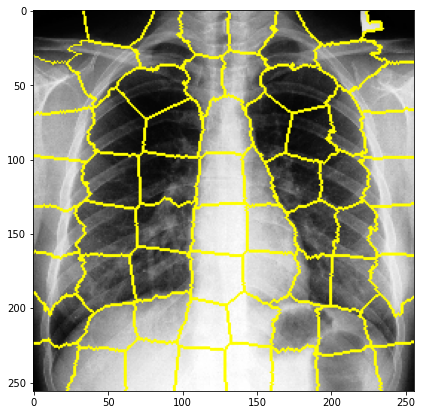

In [ ]:
from skimage.data import astronaut
from skimage.segmentation import slic
from scipy.spatial import Delaunay
from skimage.segmentation import mark_boundaries
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
import copy
img = X_orig[25]
# SLIC
segments = slic(img, n_segments=60, compactness=0.5)
segments_ids = np.unique(segments)

# centers
centers = np.array([np.mean(np.nonzero(segments==i),axis=1) for i in segments_ids])

vs_right = np.vstack([segments[:,:-1].ravel(), segments[:,1:].ravel()])
vs_below = np.vstack([segments[:-1,:].ravel(), segments[1:,:].ravel()])
bneighbors = np.unique(np.hstack([vs_right, vs_below]), axis=1)

fig = plt.figure(figsize=(7,7))
plt.imshow(mark_boundaries(img, segments))



[0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0
 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0]


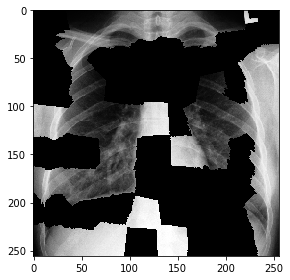

In [ ]:
num_superpixels = segments_ids.shape[0]
num_perturb = 150
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))

#Create function to apply perturbations to images
import copy
def perturb_image(img,perturbation,segments): 
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1 
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image*mask[:,:]
  return perturbed_image

#Show example of perturbations
print(perturbations[0]) 
skimage.io.imshow(perturb_image(img,perturbations[0],segments))

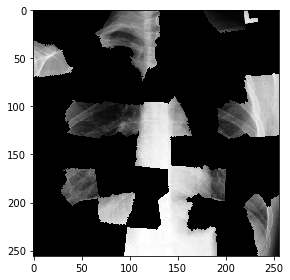

In [ ]:
skimage.io.imshow(perturb_image(img,perturbations[1],segments))

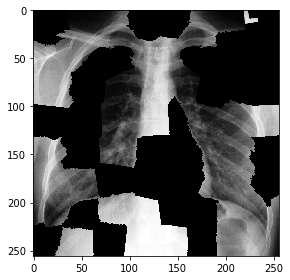

In [ ]:
skimage.io.imshow(perturb_image(img,perturbations[2],segments))

In [ ]:
predictions = []
for pert in perturbations:
  perturbed_img = perturb_image(img,pert,segments)
  pred = clf.predict_proba([perturbed_img.ravel()])
  predictions.append(pred)

predictions = np.array(predictions)
print(predictions.shape)

(150, 1, 3)


In [ ]:
#Compute distances to original image
import sklearn.metrics
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
print(distances.shape)

#Transform distances to a value between 0 an 1 (weights) using a kernel function
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
print(weights.shape)

(150,)
(150,)


In [ ]:
clf.classes_

array(['C', 'N', 'V'], dtype=object)

In [ ]:
clf.classes_

array(['C', 'N', 'V'], dtype=object)

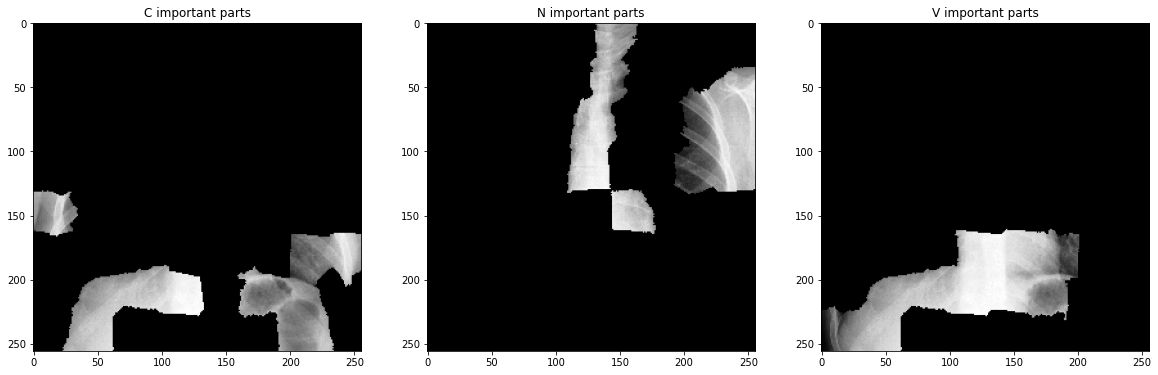

In [ ]:
from sklearn.linear_model import LinearRegression
plt.figure(figsize=(20,10))
for i in range(3):
  class_to_explain = i
  simpler_model = LinearRegression()
  simpler_model.fit(X=perturbations, y=predictions[:,:,class_to_explain], sample_weight=weights)
  coeff = simpler_model.coef_[0]

  #Use coefficients from linear model to extract top features
  num_top_features = 10
  top_features = np.argsort(coeff)[-num_top_features:] 

  #Show only the superpixels corresponding to the top features
  mask = np.zeros(num_superpixels) 
  mask[top_features]= True #Activate top superpixels
  plt.subplot(1, 3, i+1)
  plt.title(clf.classes_[i]+" important parts")
  plt.imshow(perturb_image(img,mask,segments),cmap="gray")

In [ ]:
def LIME(index):
  img = X_orig[index]
  print("<real>")
  print(y_train_DG[index])
  print("<predict>")
  print(clf.classes_,clf.predict_proba(pd.DataFrame(X_train_DG.loc[index,:]).T))
  # SLIC
  segments = slic(img, n_segments=60, compactness=0.5)
  segments_ids = np.unique(segments)

  # centers
  centers = np.array([np.mean(np.nonzero(segments==i),axis=1) for i in segments_ids])

  vs_right = np.vstack([segments[:,:-1].ravel(), segments[:,1:].ravel()])
  vs_below = np.vstack([segments[:-1,:].ravel(), segments[1:,:].ravel()])
  bneighbors = np.unique(np.hstack([vs_right, vs_below]), axis=1)

  fig = plt.figure(figsize=(6,6))
  plt.title("image superpixel")
  plt.imshow(mark_boundaries(img, segments))
  predictions = []
  for pert in perturbations:
    perturbed_img = perturb_image(img,pert,segments)
    pred = clf.predict_proba([perturbed_img.ravel()])
    predictions.append(pred)

  predictions = np.array(predictions)
  #Compute distances to original image
  import sklearn.metrics
  original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
  distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()

  #Transform distances to a value between 0 an 1 (weights) using a kernel function
  kernel_width = 0.25
  weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
  from sklearn.linear_model import LinearRegression
  plt.figure(figsize=(20,10))
  for i in range(3):
    class_to_explain = i
    simpler_model = LinearRegression()
    simpler_model.fit(X=perturbations, y=predictions[:,:,class_to_explain], sample_weight=weights)
    coeff = simpler_model.coef_[0]

    #Use coefficients from linear model to extract top features
    num_top_features = 10
    top_features = np.argsort(coeff)[-num_top_features:] 

    #Show only the superpixels corresponding to the top features
    mask = np.zeros(num_superpixels) 
    mask[top_features]= True #Activate top superpixels
    plt.subplot(1, 3, i+1)
    plt.title(clf.classes_[i]+" important parts")
    plt.imshow(perturb_image(img,mask,segments),cmap="gray")

<real>
C
<predict>
['C' 'N' 'V'] [[0.98301151 0.01191043 0.00507806]]


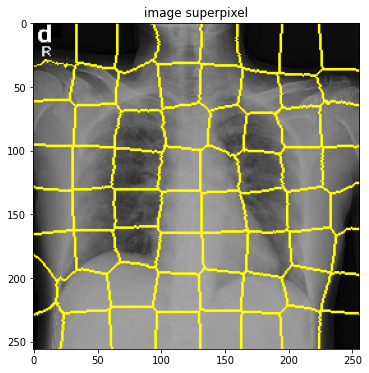

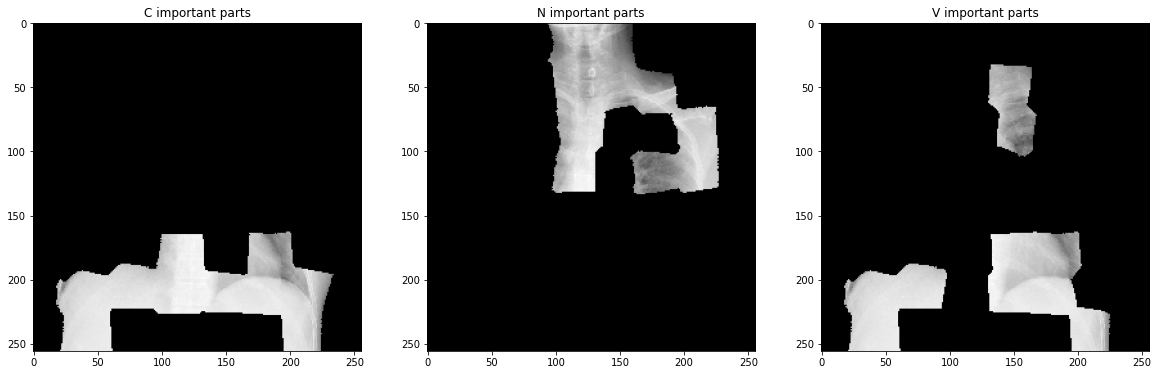

In [ ]:
LIME(50)

<real>
N
<predict>
['C' 'N' 'V'] [[0.00535339 0.35274046 0.64190615]]


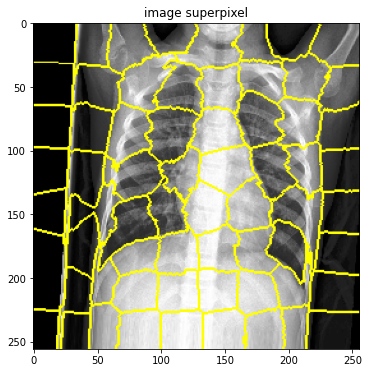

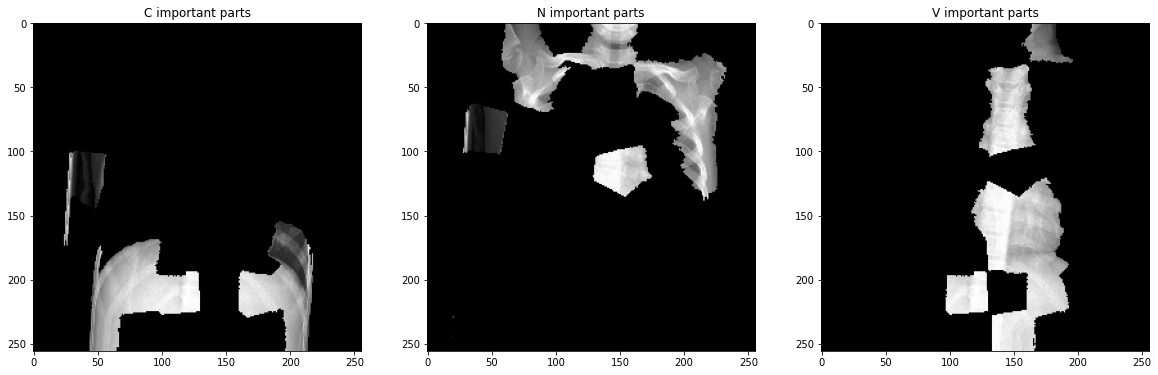

In [ ]:
LIME(300)

<real>
V
<predict>
['C' 'N' 'V'] [[0.01809655 0.09638374 0.88551971]]


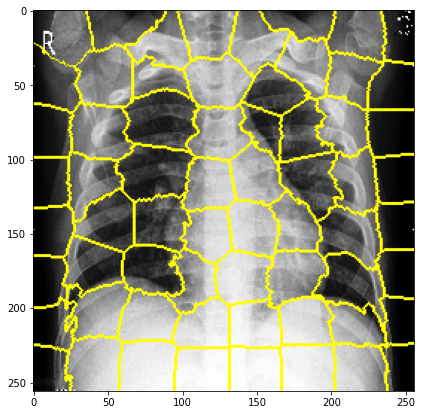

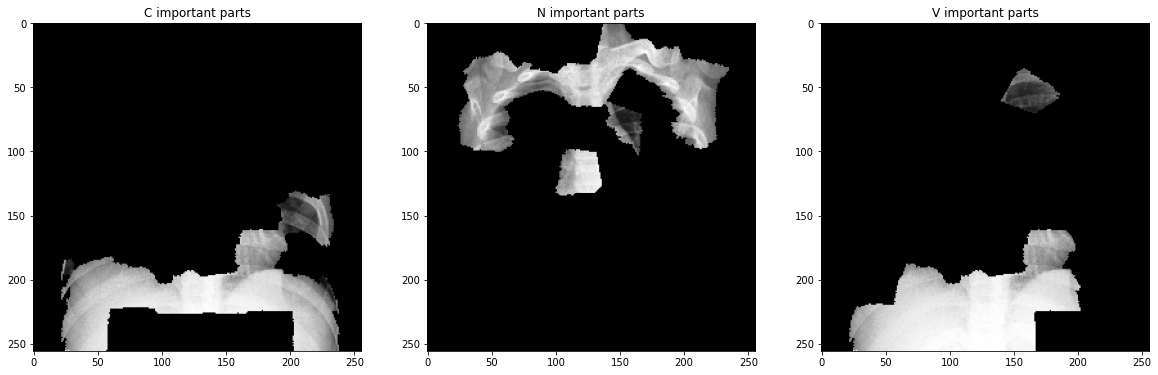

In [ ]:
LIME(120)

In [ ]:
y_train_DG[120:130]

array(['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'], dtype=object)

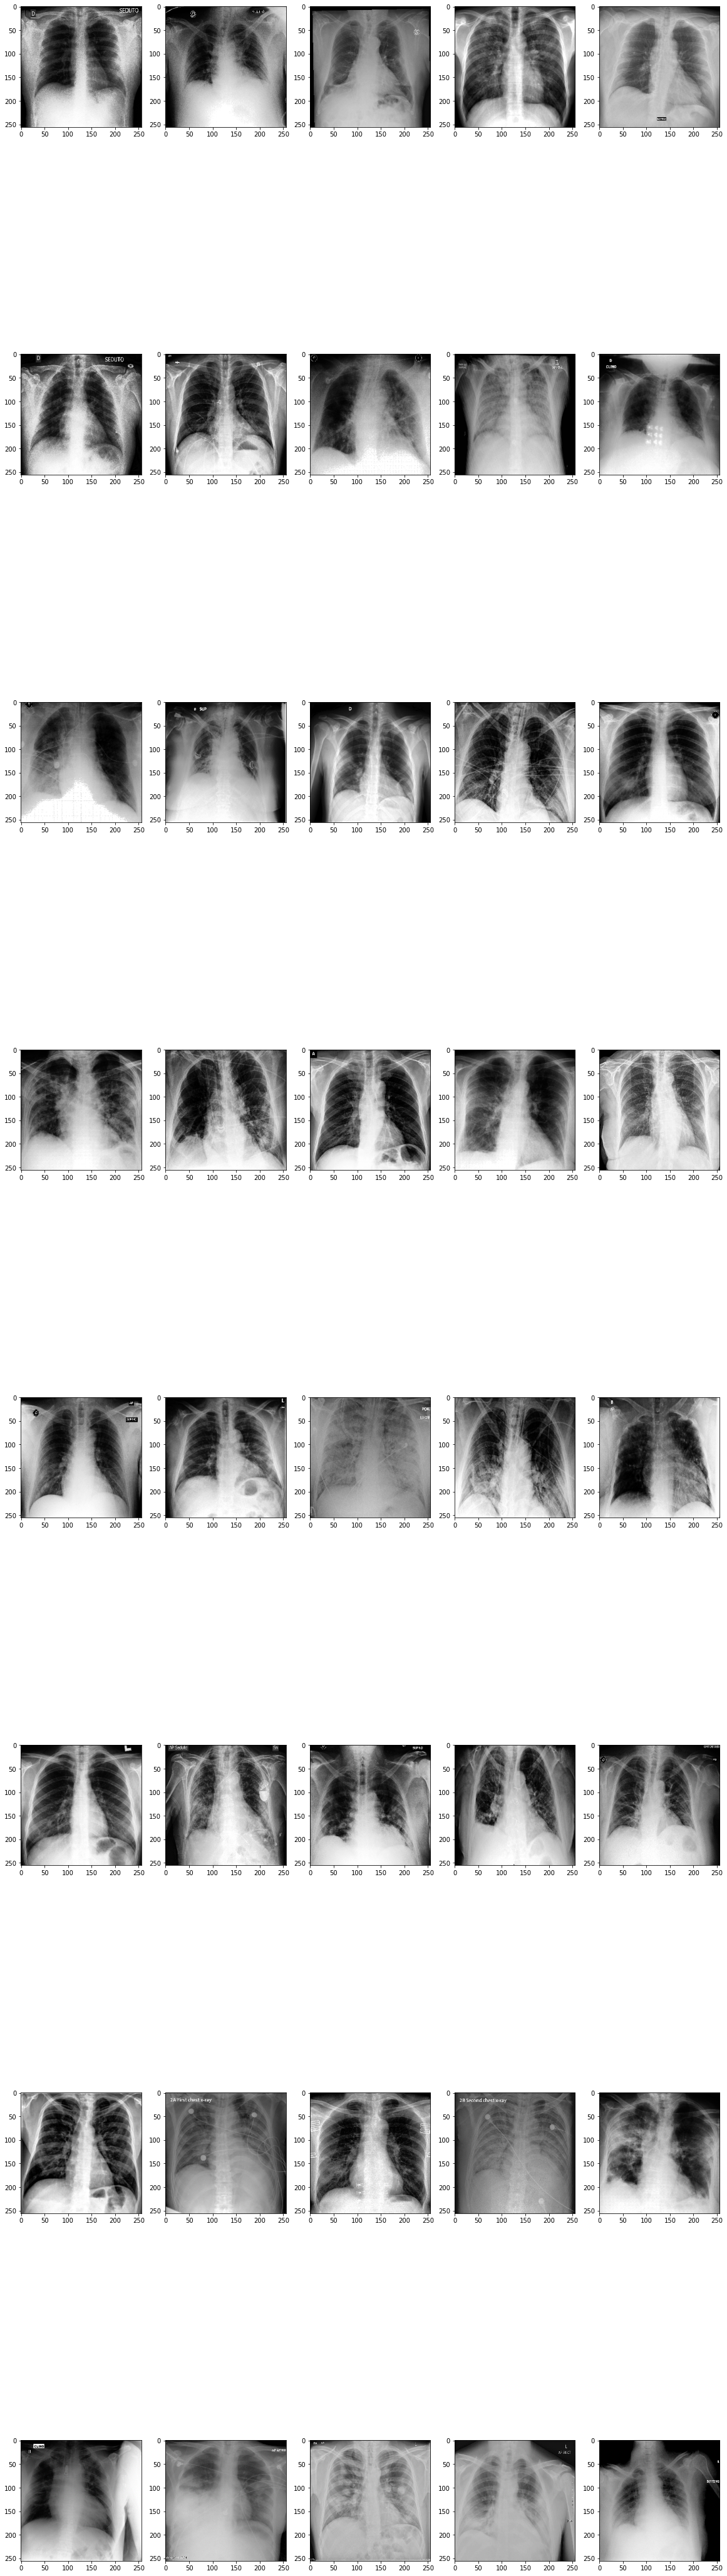

In [ ]:
plt.figure(figsize=(20,80))
index = 0
for i in range(0,40):
  X_tra_image = X_train_DG.copy()
  sep = X_tra_image.iloc[i,:].values.reshape(256,256)
  index += 1
  plt.subplot(8, 5, index)
  plt.imshow(sep,cmap='gray')

In [ ]:
y_train_DG[120:130]

array(['V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V'], dtype=object)

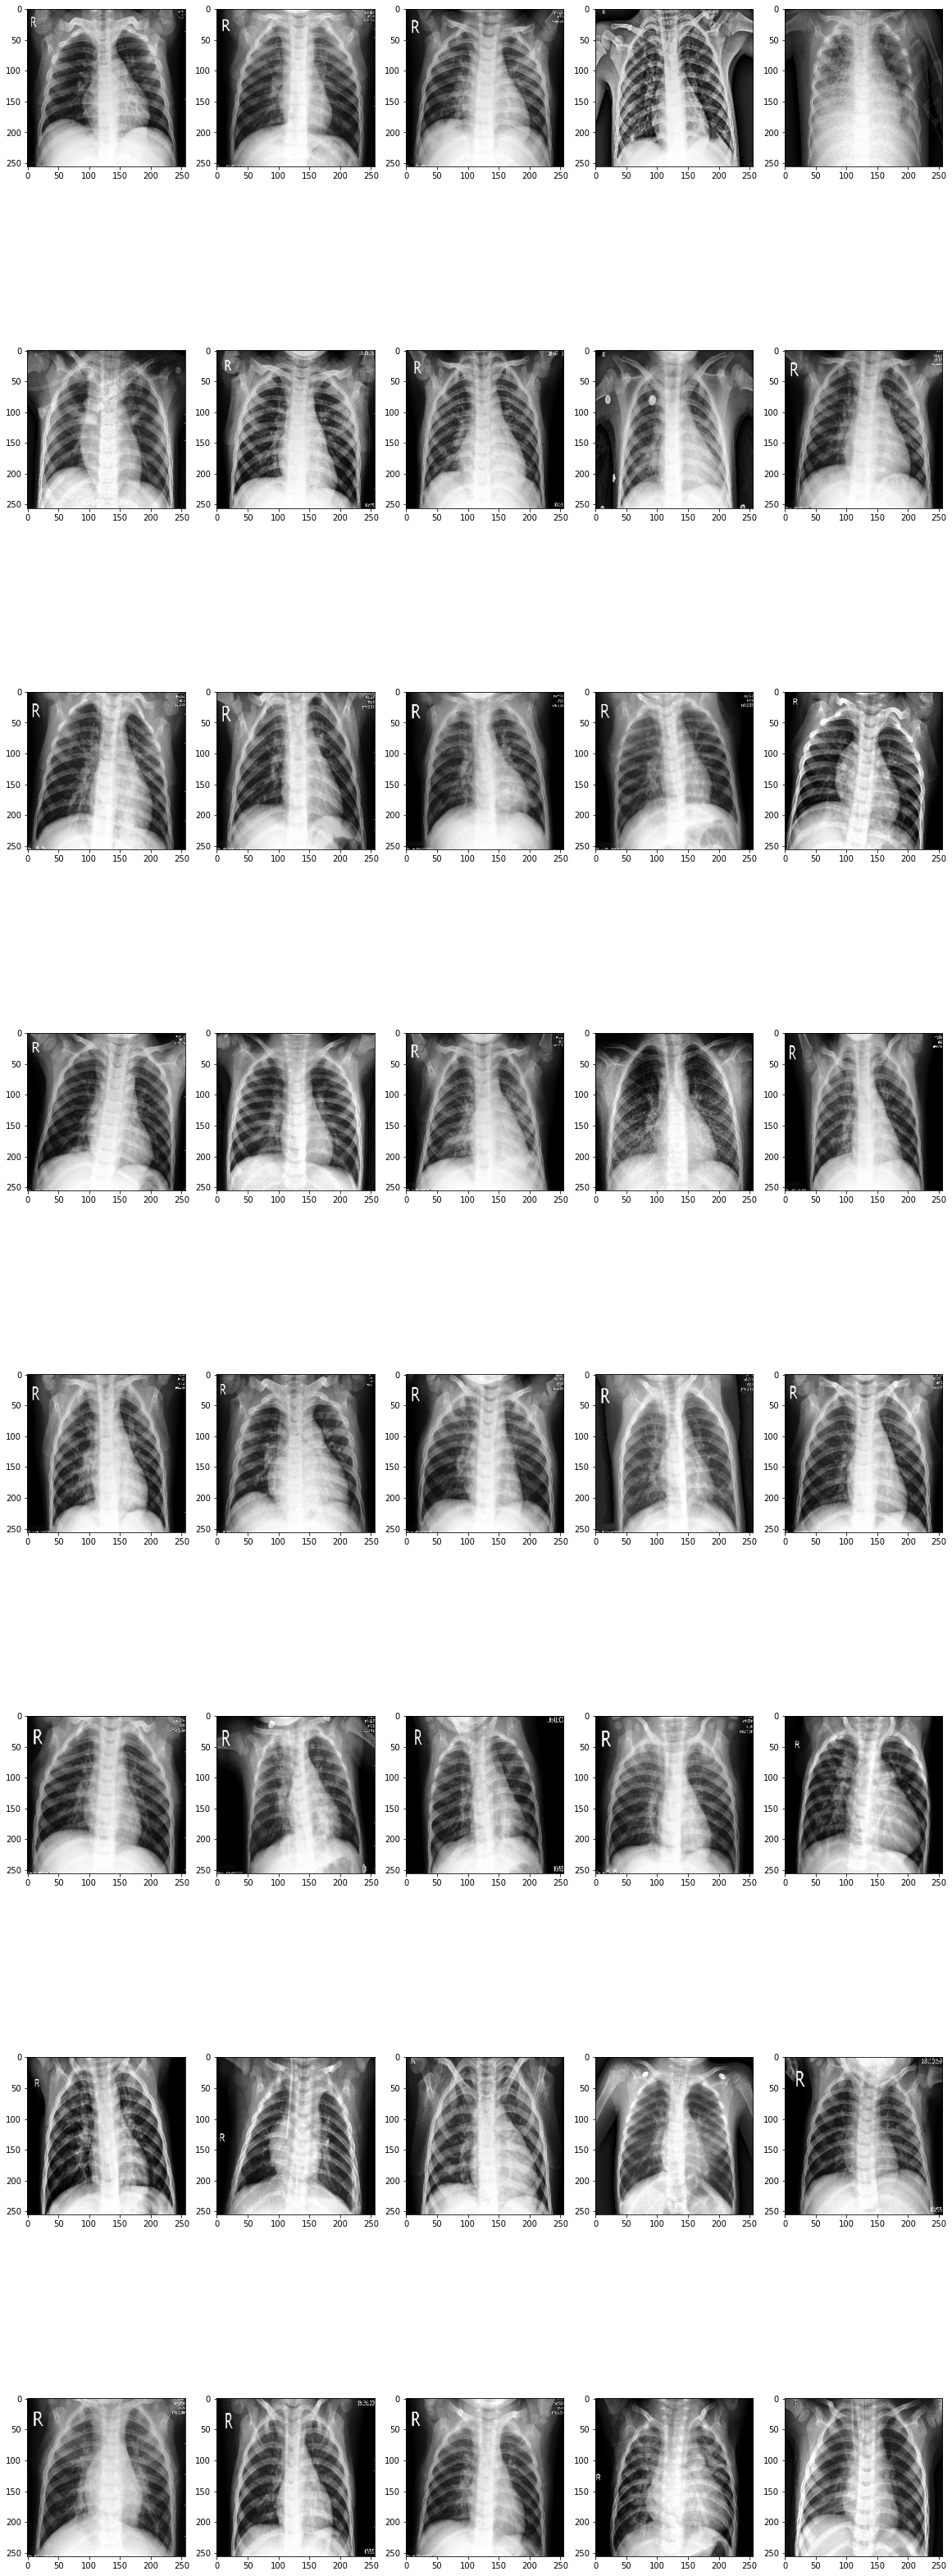

In [ ]:
plt.figure(figsize=(20,60))
index = 0
for i in range(120,160):
  X_tra_image = X_train_DG.copy()
  sep = X_tra_image.iloc[i,:].values.reshape(256,256)
  index += 1
  plt.subplot(8, 5, index)
  plt.imshow(sep,cmap='gray')

In [ ]:
y_train_DG[280:310]

array(['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N'], dtype=object)

In [ ]:
len(X_train_DG)

333

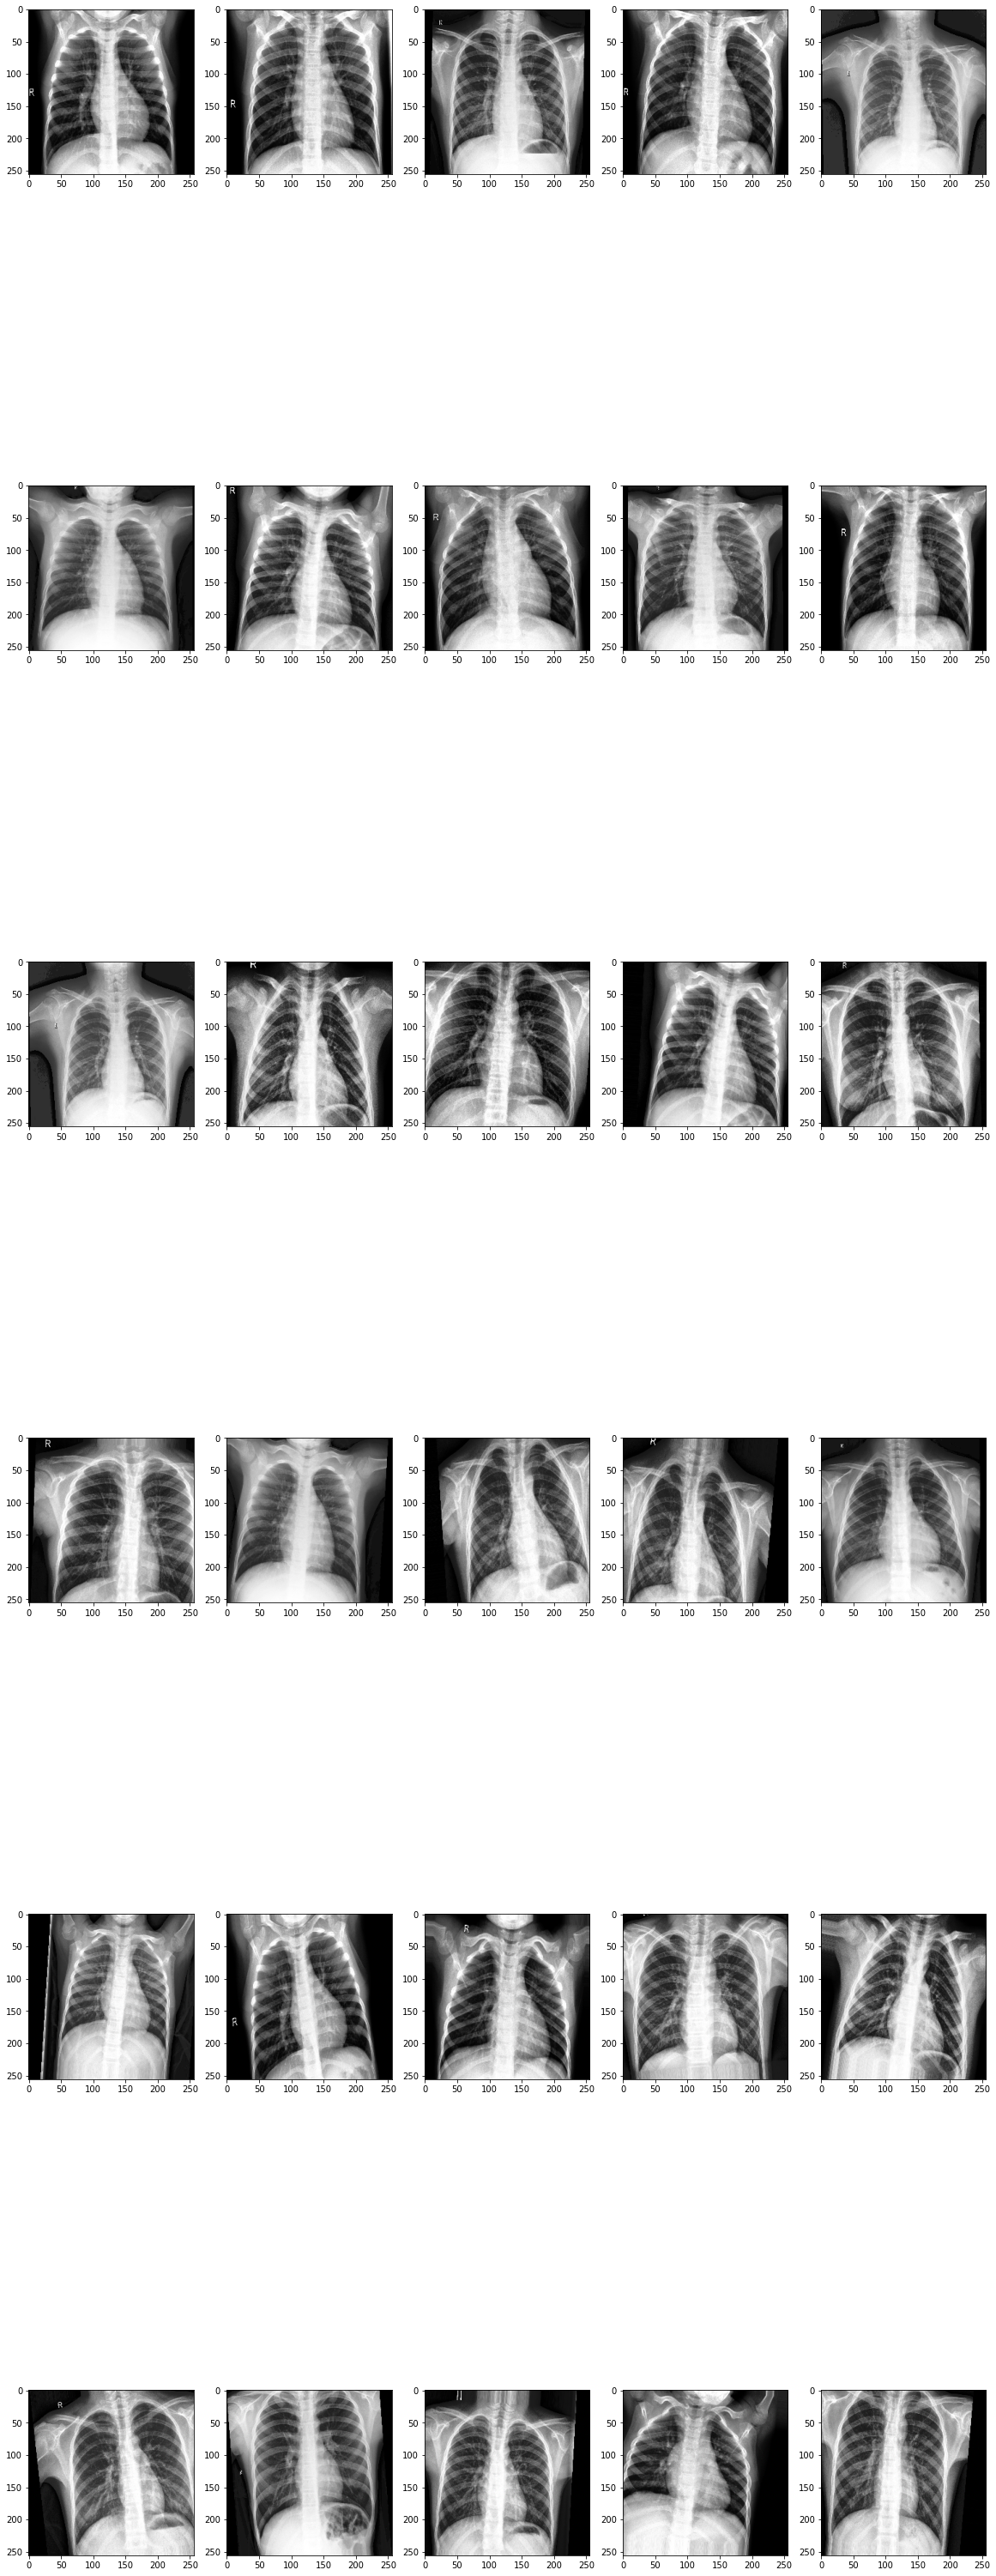

In [ ]:
plt.figure(figsize=(20,80))
index = 0
for i in range(280,310):
  X_tra_image = X_train_DG.copy()
  sep = X_tra_image.iloc[i,:].values.reshape(256,256)
  index += 1
  plt.subplot(8, 5, index)
  plt.imshow(sep,cmap='gray')